In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df= pd.read_excel("Copy of loan.xlsx")

In [3]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

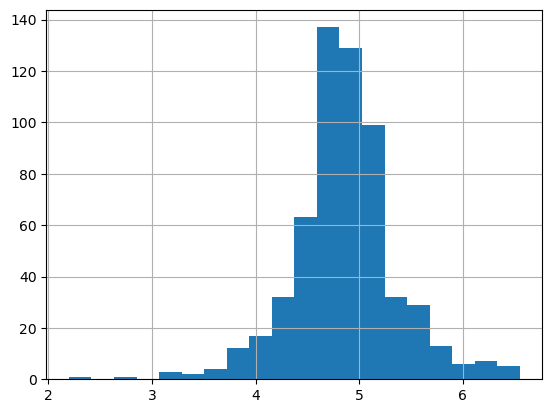

In [6]:
df['loanAmount_log'] = np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

<Axes: >

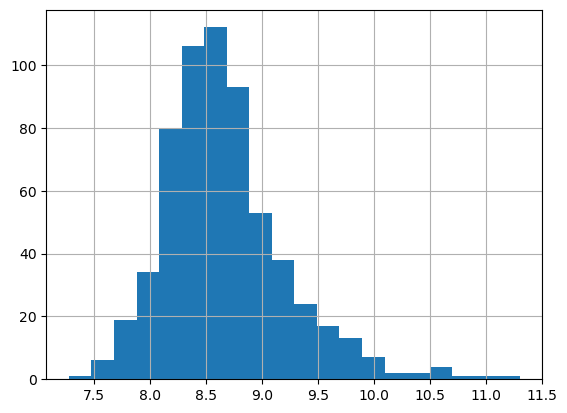

In [7]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(df['Married'].mode()[0], inplace= True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace= True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log= df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_3260\2083009463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace= True)
C:\Users\User\AppData\Local\Temp\ipykernel_3260\2083009463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [26]:
X= df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [27]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


number of people who take loan as group by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\2240154209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette= 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

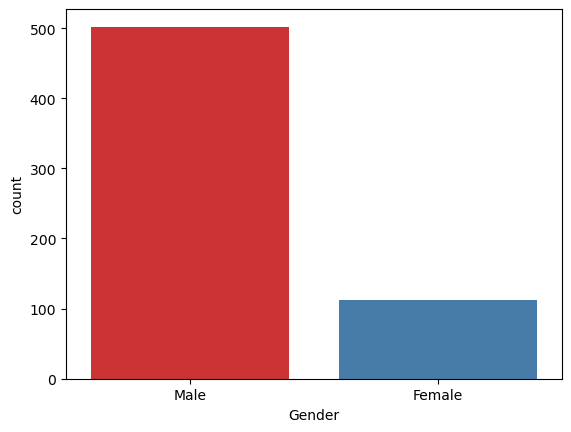

In [28]:
print("number of people who take loan as group by gender")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette= 'Set1')

number of people who take loan as group by material status: 
Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\4228455877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette= 'Set1')


<Axes: xlabel='Married', ylabel='count'>

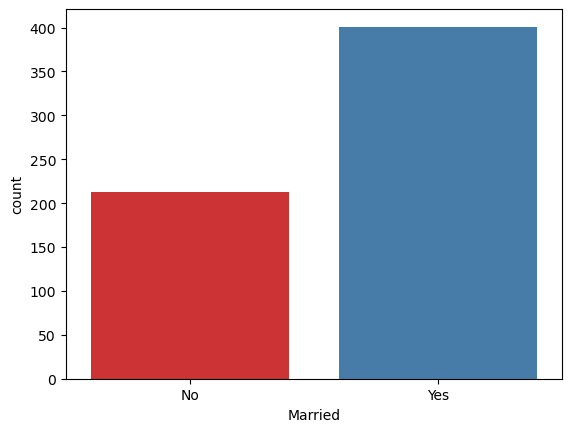

In [29]:
print("number of people who take loan as group by material status: ")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette= 'Set1') 

number of people who take loan as group by dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\3166366923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette= 'Set1')


<Axes: xlabel='Dependents', ylabel='count'>

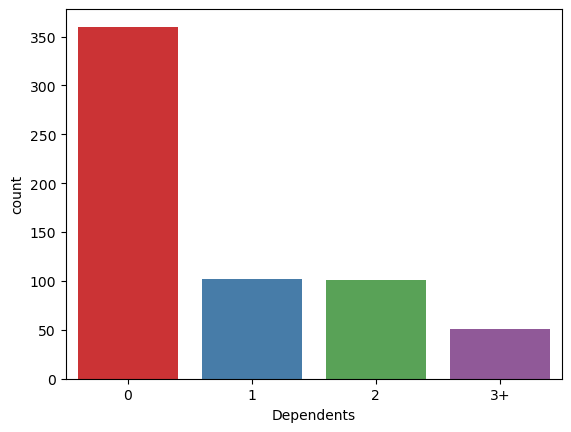

In [30]:
print("number of people who take loan as group by dependents")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette= 'Set1')

number of people who take loan as group by self employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\2257866800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette= 'Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

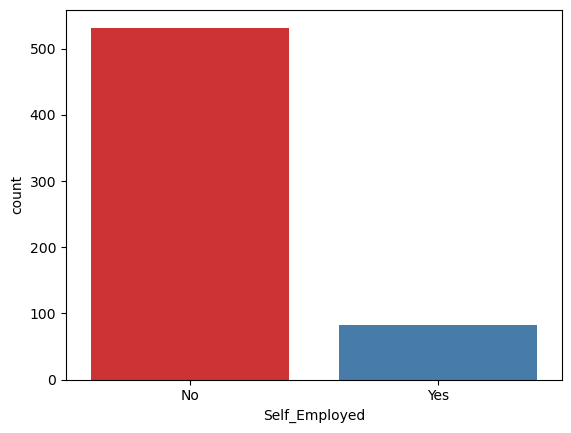

In [31]:
print("number of people who take loan as group by self employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette= 'Set1') 

number of people who take loan as group by Loanamount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
187.000000    12
              ..
292.000000     1
142.000000     1
350.000000     1
496.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\1606079499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette= 'Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

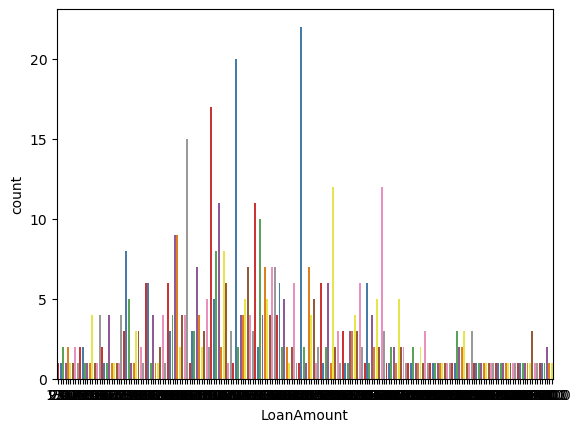

In [32]:
print("number of people who take loan as group by Loanamount")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette= 'Set1') 

number of people who take loan as group by Credit history
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_3260\915041926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette= 'Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

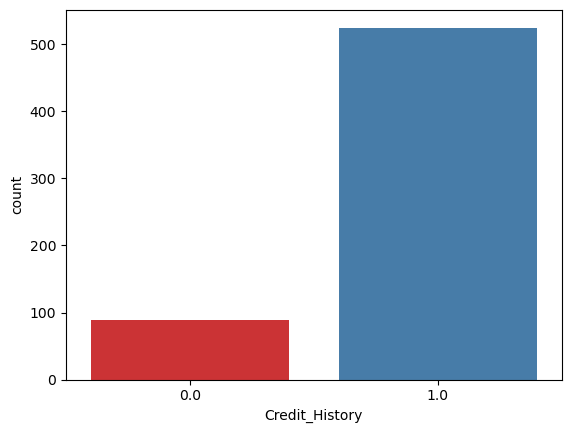

In [33]:
print("number of people who take loan as group by Credit history")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette= 'Set1') 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [35]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x= LabelEncoder()

In [40]:
for i in [0,1,2,3,4,7]:
    X_train[:,i]= Labelencoder_x.fit_transform(X_train[:,i].astype(str))

In [41]:
for i in range(0, 5):
   X_train[:,i]= Labelencoder_x.fit_transform(X_train[:,i])
   X_train[:,7]= Labelencoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 187],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 343],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 167],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 294],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 194],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 226]], dtype=object)